In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv("abalone.csv")
data = data.to_numpy()
data

array([['M', 0.35, 0.265, ..., 0.0485, 0.07, 7],
       ['F', 0.53, 0.42, ..., 0.1415, 0.21, 9],
       ['M', 0.44, 0.365, ..., 0.114, 0.155, 10],
       ...,
       ['M', 0.6, 0.475, ..., 0.2875, 0.308, 9],
       ['F', 0.625, 0.485, ..., 0.261, 0.29600000000000004, 10],
       ['M', 0.71, 0.555, ..., 0.3765, 0.495, 12]], dtype=object)

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

datax = data[:,1:9]
datay = data[:,0]

trainx,testx,trainy,testy = train_test_split(datax,datay,test_size = 0.3)
e = LabelEncoder();
e.fit(trainy)
trainy_e = e.transform(trainy)
testy_e = e.transform(testy)

# 

trainy_e = np.reshape(trainy_e,(-1,1)) # 정규화를 위해 모양을 바꿔줌

In [57]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
Scaler.fit(trainx)
Scaler.fit(trainy_e)c


MinMaxScaler(copy=True, feature_range=(0, 1))

In [59]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(800,))
clf.fit(trainx,trainy_e)
testy_hat = clf.predict(testx) 

C:\Users\micke\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [60]:
dif = testy_e - testy_hat
accuracy = 1 - (np.size(np.where(dif != 0))/np.size(testy_e))
print(accuracy) 


0.5522745411013568


In [70]:
import tensorflow as tf
import keras
from keras import layers, models, optimizers
from tensorflow.keras.models import Sequential
from keras.utils import to_categorical

In [87]:
input_shape = (8,)

mlp_model = models.Sequential()
mlp_model.add(layers.Dense(units = 600, activation = 'relu', input_shape=input_shape))
mlp_model.add(layers.Dense(units = 1200, activation = 'relu'))
mlp_model.add(layers.Dense(units = 600, activation = 'relu'))
mlp_model.add(layers.Dense(units = 3, activation = 'softmax'))

mlp_model.compile(optimizer='Adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [88]:
mlp_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 600)               5400      
_________________________________________________________________
dense_22 (Dense)             (None, 1200)              721200    
_________________________________________________________________
dense_23 (Dense)             (None, 600)               720600    
_________________________________________________________________
dense_24 (Dense)             (None, 3)                 1803      
Total params: 1,449,003
Trainable params: 1,449,003
Non-trainable params: 0
_________________________________________________________________


In [89]:
history = mlp_model.fit(trainx,trainy_e, validation_data= [testx,testy_e], batch_size= 250, epochs= 50)


Train on 2923 samples, validate on 1253 samples
Epoch 1/50
2923/2923 [==============================] - 2s 739us/step - loss: 1.2830 - acc: 0.3360 - val_loss: 1.0724 - val_acc: 0.4637
Epoch 2/50
2923/2923 [==============================] - 1s 209us/step - loss: 1.0677 - acc: 0.3958 - val_loss: 1.0370 - val_acc: 0.3615
Epoch 3/50
2923/2923 [==============================] - 1s 211us/step - loss: 1.0207 - acc: 0.4270 - val_loss: 0.9737 - val_acc: 0.4892
Epoch 4/50
2923/2923 [==============================] - 1s 212us/step - loss: 0.9563 - acc: 0.4995 - val_loss: 0.9107 - val_acc: 0.5339
Epoch 5/50
2923/2923 [==============================] - 1s 218us/step - loss: 0.9509 - acc: 0.4940 - val_loss: 0.8945 - val_acc: 0.5156
Epoch 6/50
2923/2923 [==============================] - 1s 213us/step - loss: 0.9276 - acc: 0.5077 - val_loss: 0.8833 - val_acc: 0.5531
Epoch 7/50
2923/2923 [==============================] - 1s 211us/step - loss: 0.9080 - acc: 0.5255 - val_loss: 0.8715 - val_acc: 0.5267


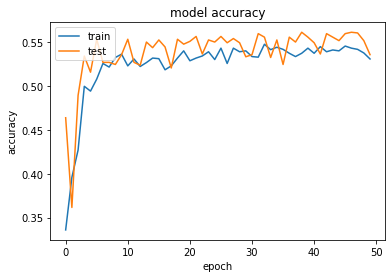

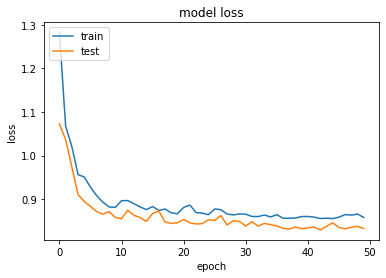

In [91]:
plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [92]:
max(history.history['val_acc']) 

0.5610534757114085